In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.drop_duplicates()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df.drop(columns = ['address','phone','url','reviews_list','dish_liked','menu_item'],
        inplace=True)

In [5]:
df.rename(columns = {'book_table':'Table_Booking',
           'approx_cost(for two people)':'Approx_Cost_for_2',
           'rate':'Ratings','votes':'Votes','rest_type':'Restautrant_Type',
           'listed_in(type)':'Listed_in_Type',
           'listed_in(city)':'Listed_in_City',
           'name':'Restaurant_Name'}, 
          inplace=True)
df.columns = df.columns.str.lower()

In [6]:
df.head()

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,approx_cost_for_2,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df['restaurant_name'].unique().tolist()

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [8]:
# Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©

In [9]:
df['restaurant_name'] = df['restaurant_name'].str.replace(r'[Ã\x83]|[Â\x82]|[\x92]+', '', regex =True).str.replace(r'©', 'e', regex =True)

In [10]:
df['ratings'] = df['ratings'].str.replace(r'[\s*/\s*5]','', regex = True)

In [11]:
# df['restaurant_name'] = df['restaurant_name'].str.replace("Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©",'e')

In [12]:
df['ratings'].replace(['NEW','-'],0, inplace = True)


In [13]:
df['ratings'].unique()


array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.', nan,
       '2.6', '3.4', '4.', '2.', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [14]:
df.isna().sum() / df.shape[0]

restaurant_name      0.000000
online_order         0.000000
table_booking        0.000000
ratings              0.150337
votes                0.000000
location             0.000406
restautrant_type     0.004389
cuisines             0.000870
approx_cost_for_2    0.006690
listed_in_type       0.000000
listed_in_city       0.000000
dtype: float64

In [15]:
df['ratings'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.', nan,
       '2.6', '3.4', '4.', '2.', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [16]:
df['ratings']=df['ratings'].astype('float')

In [17]:
df['ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, nan, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 1.8])

In [18]:
df['ratings'][df['ratings'].notnull()].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3, 4.8,
       4.9, 2.1, 1.8])

In [19]:
df.dropna(inplace=True)

In [20]:
df['ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3, 4.8,
       4.9, 2.1, 1.8])

In [21]:
df['restautrant_type'].unique().tolist()

['Casual Dining',
 'Cafe, Casual Dining',
 'Quick Bites',
 'Casual Dining, Cafe',
 'Cafe',
 'Quick Bites, Cafe',
 'Cafe, Quick Bites',
 'Delivery',
 'Mess',
 'Dessert Parlor',
 'Bakery, Dessert Parlor',
 'Pub',
 'Bakery',
 'Takeaway, Delivery',
 'Fine Dining',
 'Beverage Shop',
 'Sweet Shop',
 'Bar',
 'Dessert Parlor, Sweet Shop',
 'Bakery, Quick Bites',
 'Sweet Shop, Quick Bites',
 'Kiosk',
 'Food Truck',
 'Quick Bites, Dessert Parlor',
 'Beverage Shop, Quick Bites',
 'Beverage Shop, Dessert Parlor',
 'Takeaway',
 'Pub, Casual Dining',
 'Casual Dining, Bar',
 'Dessert Parlor, Beverage Shop',
 'Quick Bites, Bakery',
 'Microbrewery, Casual Dining',
 'Lounge',
 'Bar, Casual Dining',
 'Food Court',
 'Cafe, Bakery',
 'Dhaba',
 'Quick Bites, Sweet Shop',
 'Microbrewery',
 'Food Court, Quick Bites',
 'Quick Bites, Beverage Shop',
 'Pub, Bar',
 'Casual Dining, Pub',
 'Lounge, Bar',
 'Dessert Parlor, Quick Bites',
 'Food Court, Dessert Parlor',
 'Casual Dining, Sweet Shop',
 'Food Court, Casua

In [22]:
df

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,approx_cost_for_2,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.0,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [23]:
df['cuisines']=df['cuisines'].map(lambda x: x.split(','))
df['cuisines']

0                      [North Indian,  Mughlai,  Chinese]
1                         [Chinese,  North Indian,  Thai]
2                              [Cafe,  Mexican,  Italian]
3                           [South Indian,  North Indian]
4                             [North Indian,  Rajasthani]
                               ...                       
51709                        [North Indian,  Continental]
51711    [Andhra,  South Indian,  Chinese,  North Indian]
51712                                       [Continental]
51715                                       [Finger Food]
51716          [Finger Food,  North Indian,  Continental]
Name: cuisines, Length: 43533, dtype: object

In [24]:
# df['cuisines']=df['cuisines'].map(lambda x: x.split(','))
df=df.explode('cuisines')

In [25]:
df['restautrant_type']=df['restautrant_type'].map(lambda x: x.split(','))
df['restautrant_type']


0              [Casual Dining]
0              [Casual Dining]
0              [Casual Dining]
1              [Casual Dining]
1              [Casual Dining]
                 ...          
51712                    [Bar]
51715                    [Bar]
51716    [Bar,  Casual Dining]
51716    [Bar,  Casual Dining]
51716    [Bar,  Casual Dining]
Name: restautrant_type, Length: 110893, dtype: object

In [26]:
df = df.explode('restautrant_type')

In [27]:
df

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,approx_cost_for_2,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,800,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,800,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,"1,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,"1,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,"1,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,"1,500",Pubs and bars,Whitefield


In [28]:
df.isnull().sum()

restaurant_name      0
online_order         0
table_booking        0
ratings              0
votes                0
location             0
restautrant_type     0
cuisines             0
approx_cost_for_2    0
listed_in_type       0
listed_in_city       0
dtype: int64

In [29]:
df['approx_cost_for_2']=df['approx_cost_for_2'].str.replace(',','')
# df['approx_cost_for_2']
#

In [30]:
df['approx_cost_for_2']=df['approx_cost_for_2'].astype('float')

# df['approx_cost_for_2']

In [31]:
df['approx_cost_for_2']=df['approx_cost_for_2'].apply(lambda x : x/2)


In [32]:
df.rename(columns={"approx_cost_for_2":'cost_per_head'},inplace=True)

In [33]:
df['cost_per_head']#=df['approx_cost_for_2'].astype('float')

0        400.0
0        400.0
0        400.0
1        400.0
1        400.0
         ...  
51716    750.0
51716    750.0
51716    750.0
51716    750.0
51716    750.0
Name: cost_per_head, Length: 131060, dtype: float64

In [34]:
df

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,cost_per_head,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,750.0,Pubs and bars,Whitefield


In [35]:
df.head()

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,cost_per_head,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari


In [36]:
df[df['ratings']>4.1]

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,cost_per_head,listed_in_type,listed_in_city
7,Onesta,Yes,Yes,4.6,2556,Banashankari,Casual Dining,Pizza,300.0,Cafes,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,Cafe,Pizza,300.0,Cafes,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,Casual Dining,Cafe,300.0,Cafes,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,Cafe,Cafe,300.0,Cafes,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,Casual Dining,Italian,300.0,Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,1313,Whitefield,Casual Dining,Chinese,900.0,Pubs and bars,Whitefield
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,1313,Whitefield,Bar,Chinese,900.0,Pubs and bars,Whitefield
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,1313,Whitefield,Casual Dining,Thai,900.0,Pubs and bars,Whitefield
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,1313,Whitefield,Bar,Thai,900.0,Pubs and bars,Whitefield


DATA VISUALIZATION

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt


In [38]:
df

,restaurant_name,online_order,table_booking,ratings,votes,location,restautrant_type,cuisines,cost_per_head,listed_in_type,listed_in_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,750.0,Pubs and bars,Whitefield


Text(0.5, 1.0, 'Restaurants delivering online')

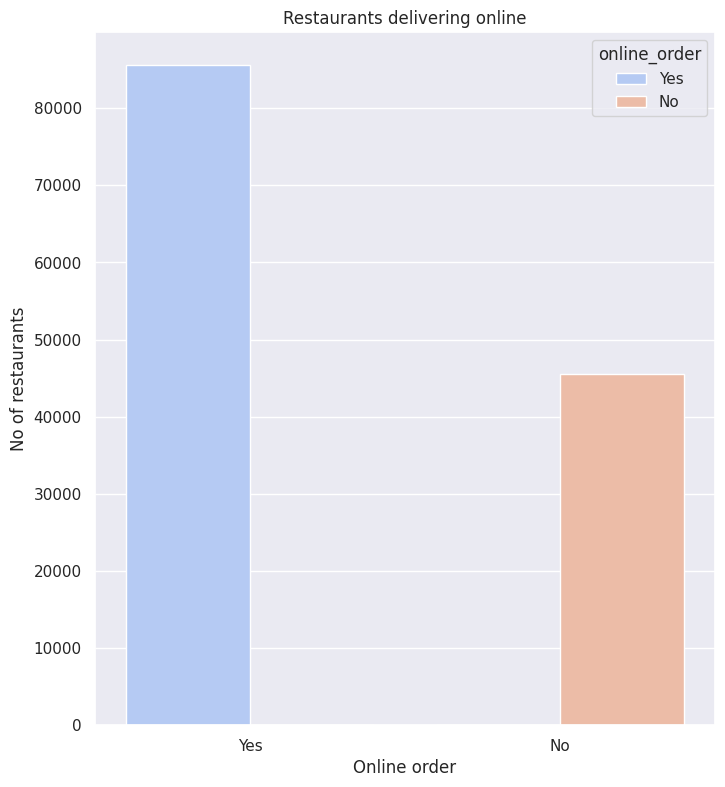

In [39]:
sns.set_theme(style='darkgrid')
plt.figure(figsize= (8,9))
s=sns.countplot(x='online_order',hue='online_order',data=df,palette='coolwarm')
s.set_xlabel("Online order")
s.set_ylabel("No of restaurants")
s.set_title("Restaurants delivering online")

In [40]:
import plotly.express as px
import pandas as pd

# Assuming `df` is your pandas DataFrame containing the data

fig = px.histogram(df, x='online_order', color='online_order', title='Restaurants delivering online',
                   labels={'online_order': 'Online order', 'count': 'No of restaurants'},
                   category_orders={'online_order': ['Yes', 'No']},width=400,height=600)
fig.update_layout(xaxis_title="Online order", yaxis_title="No of restaurants", barmode='group',bargap=0.3,bargroupgap=0.1)
fig.show()


Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table Booking')

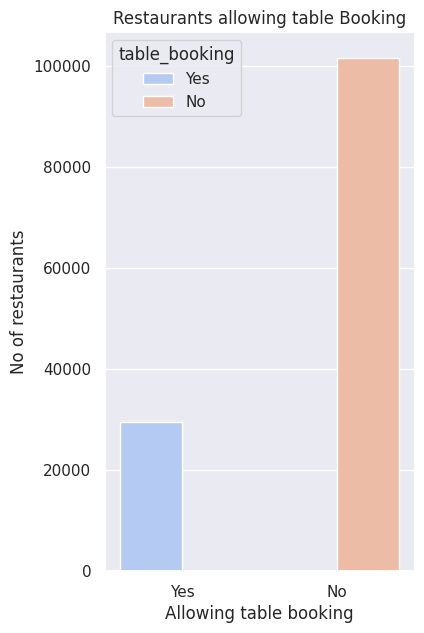

In [41]:
sns.set_theme(style='darkgrid')
plt.figure(figsize= (4,7))
s=sns.countplot(x='table_booking',hue='table_booking',data=df,palette='coolwarm')
s.set_xlabel("Allowing table booking")
s.set_ylabel("No of restaurants")
s.set_title("Restaurants allowing table Booking")

/tmp/ipykernel_21/4171385277.py:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



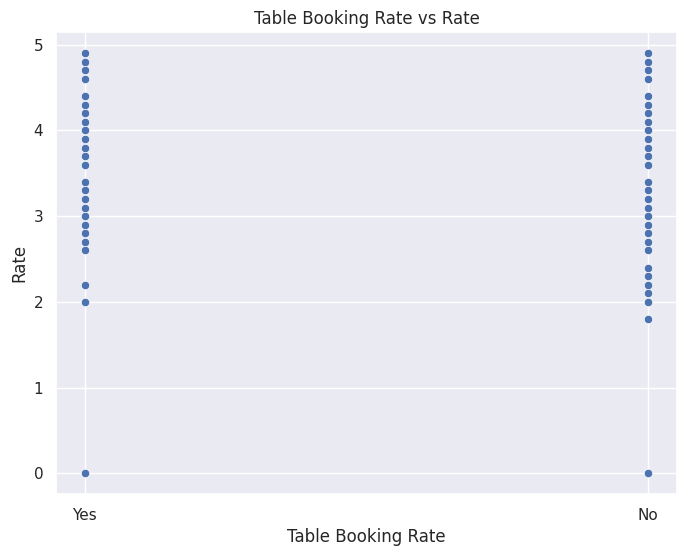

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Table booking Rate' and 'Rate' are columns in your DataFrame 'df'

sns.set_theme(style='darkgrid')

plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x='table_booking', y='ratings', data=df, palette='coolwarm')
scatter_plot.set_xlabel('Table Booking Rate')
scatter_plot.set_ylabel('Rate')
scatter_plot.set_title('Table Booking Rate vs Rate')
plt.show()


Text(0, 0.5, 'Ratings')

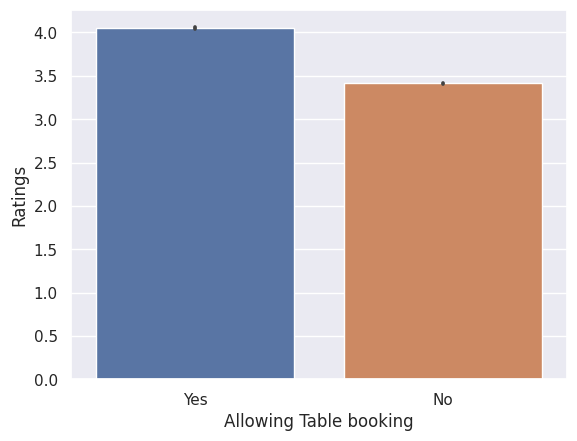

In [43]:
s=sns.barplot(x='table_booking', y='ratings', data=df)
s.set_xlabel("Allowing Table booking")
s.set_ylabel("Ratings")


In [44]:
cus=df.groupby(['restaurant_name']).agg({'ratings':'sum','votes':'sum'}).sort_values(by=['ratings','votes'],ascending=False)
cus

,ratings,votes
restaurant_name,,
Onesta,2234.4,2085120
Hammered,1878.0,1732446
Stoner,1802.4,853764
Empire Restaurant,1513.4,932361
Haji Ali Juice Centre,1309.8,30146
...,...,...
Wow Manglore Multi Cuisine Restaurant,0.0,0
Wow Tiffin Food,0.0,0
X Cafe,0.0,0


In [45]:
cus=df.groupby(['restaurant_name']).agg({'ratings':'max','votes':'max'}).sort_values(by=['ratings','votes'],ascending=False)
cus

,ratings,votes
restaurant_name,,
Byg Brewski Brewing Company,4.9,16832
AB's - Absolute Barbecues,4.9,12121
Flechazo,4.9,7154
Asia Kitchen By Mainland China,4.9,2256
Milano Ice Cream,4.9,2090
...,...,...
Wow Manglore Multi Cuisine Restaurant,0.0,0
Wow Tiffin Food,0.0,0
X Cafe,0.0,0
